# Load Data

In [1]:
from google.colab import files

uploaded = files.upload()

Saving Restaurant reviews.csv to Restaurant reviews.csv


In [2]:
import pandas as pd

data = pd.read_csv("Restaurant reviews.csv")

data.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,7514
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0,2447.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0,NaN
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0,NaN
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0,NaN
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0,NaN


In [3]:
data.shape

(10000, 8)

In [4]:
print(data.dtypes)

Restaurant     object
Reviewer       object
Review         object
Rating         object
Metadata       object
Time           object
Pictures        int64
7514          float64
dtype: object


# Data Preprocessing

## Drop columns

In [5]:
data = data.drop(columns=['Pictures', '7514', 'Metadata'])

data.head()

,Restaurant,Reviewer,Review,Rating,Time
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,5/25/2019 15:54
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,5/25/2019 14:20
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,5/24/2019 22:54
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,5/24/2019 22:11
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,5/24/2019 21:37


In [6]:
data.shape

(10000, 5)

## Check missing values

In [7]:
print(data.isnull().sum())

Restaurant     0
Reviewer      38
Review        45
Rating        38
Time          38
dtype: int64


## Remove missing values

In [8]:
data = data.dropna(subset=['Review'])

In [9]:
print(data.isnull().sum())

Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
dtype: int64


In [10]:
data.shape

(9955, 5)

## Sentiment Analysis

### Case Folding
Standardize text into lower case

In [11]:
data['Review'] = data['Review'].str.lower()

data['Review']

/tmp/ipython-input-11-232543535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Review'] = data['Review'].str.lower()


,Review
0,"the ambience was good, food was quite good . h..."
1,ambience is too good for a pleasant evening. s...
2,a must try.. great food great ambience. thnx f...
3,soumen das and arun was a great guy. only beca...
4,food is good.we ordered kodi drumsticks and ba...
...,...
9995,madhumathi mahajan well to start with nice cou...
9996,this place has never disappointed us.. the foo...
9997,"bad rating is mainly because of ""chicken bone ..."
9998,i personally love and prefer chinese food. had...


### Vader Score

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Initialize the analyzer
sid = SentimentIntensityAnalyzer()

# Apply VADER
data['VADER_Score'] = data['Review'].apply(lambda x: sid.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [13]:
data.head()

,Restaurant,Reviewer,Review,Rating,Time,VADER_Score
0,Beyond Flavours,Rusha Chakraborty,"the ambience was good, food was quite good . h...",5,5/25/2019 15:54,0.9664
1,Beyond Flavours,Anusha Tirumalaneedi,ambience is too good for a pleasant evening. s...,5,5/25/2019 14:20,0.9360
2,Beyond Flavours,Ashok Shekhawat,a must try.. great food great ambience. thnx f...,5,5/24/2019 22:54,0.9186
3,Beyond Flavours,Swapnil Sarkar,soumen das and arun was a great guy. only beca...,5,5/24/2019 22:11,0.8591
4,Beyond Flavours,Dileep,food is good.we ordered kodi drumsticks and ba...,5,5/24/2019 21:37,0.9201


### Noise Removal

#### Non-ASCII (emojis, foreign characters) removal

In [14]:
# Check if a string contains non-ASCII characters
def contains_non_ascii(text):
    return any(ord(char) > 127 for char in text)

# Apply the filter
non_ascii_rows = data[data['Review'].apply(contains_non_ascii)]

# Display a few rows with non-ASCII characters
print(non_ascii_rows[['Review']].head(10))

                                               Review
21  please was good but it was quite expensive and...
25  the place is very good.. 5* to the live music....
26  sonalin has a great voice.. 😍 must visit the p...
27  i heard her voice..she is too beautiful with a...
28  sonalin is a very good singer in the city.. be...
30  short review: decent breads and starters, bad ...
37  the food was ❤️.. we ordered banjara tangdi fo...
40  well we’re new to hyderabad . and i can for a ...
43  my review of the place comes after multiple vi...
56  we went for lunch buffet yesterday and took a ...


In [15]:
data['Review'] = data['Review'].apply(lambda x: x.encode('ascii', 'ignore').decode())

print(data.loc[[26, 37], 'Review'])

26    sonalin has a great voice..  must visit the pl...
37    the food was .. we ordered banjara tangdi for ...
Name: Review, dtype: object


#### Punctuation Removal

In [16]:
data['Review'] = data['Review'].str.replace(r'[^\w\s]', '', regex=True)

data['Review'].head()

,Review
0,the ambience was good food was quite good had...
1,ambience is too good for a pleasant evening se...
2,a must try great food great ambience thnx for ...
3,soumen das and arun was a great guy only becau...
4,food is goodwe ordered kodi drumsticks and bas...


#### Number Removal

In [17]:
data['Review'] = data['Review'].str.replace(r'\d+', '', regex=True)

### Tokenization
Splitting text into words

In [18]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [19]:
from nltk.tokenize import word_tokenize

data['Review'] = data['Review'].apply(word_tokenize)

data['Review'].head()

,Review
0,"[the, ambience, was, good, food, was, quite, g..."
1,"[ambience, is, too, good, for, a, pleasant, ev..."
2,"[a, must, try, great, food, great, ambience, t..."
3,"[soumen, das, and, arun, was, a, great, guy, o..."
4,"[food, is, goodwe, ordered, kodi, drumsticks, ..."


### Stopword Removal

In [20]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in stop_words]

data['Review'] = data['Review'].apply(remove_stopwords)

data['Review'].head()

,Review
0,"[ambience, good, food, quite, good, saturday, ..."
1,"[ambience, good, pleasant, evening, service, p..."
2,"[must, try, great, food, great, ambience, thnx..."
3,"[soumen, das, arun, great, guy, behavior, sinc..."
4,"[food, goodwe, ordered, kodi, drumsticks, bask..."


### Lemmatization

In [22]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [23]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

data['Review'] = data['Review'].apply(lemmatize_tokens)

data['Review'].head()

,Review
0,"[ambience, good, food, quite, good, saturday, ..."
1,"[ambience, good, pleasant, evening, service, p..."
2,"[must, try, great, food, great, ambience, thnx..."
3,"[soumen, da, arun, great, guy, behavior, since..."
4,"[food, goodwe, ordered, kodi, drumstick, baske..."


### Merge

In [24]:
data['Review'] = data['Review'].apply(lambda tokens: ' '.join(tokens))

data['Review'].head()

,Review
0,ambience good food quite good saturday lunch c...
1,ambience good pleasant evening service prompt ...
2,must try great food great ambience thnx servic...
3,soumen da arun great guy behavior sincerety go...
4,food goodwe ordered kodi drumstick basket mutt...


### Sentiment Label
Categorize rating into positive, neutral, and negative

In [25]:
data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce')

def label_sentiment(rating):
    if rating >= 4:
        return 2  # Positive
    elif rating == 3:
        return 1  # Neutral
    else:
        return 0  # Negative

data['Sentiment'] = data['Rating'].apply(label_sentiment)

data.head()

,Restaurant,Reviewer,Review,Rating,Time,VADER_Score,Sentiment
0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,5/25/2019 15:54,0.9664,2
1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,5/25/2019 14:20,0.9360,2
2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,5/24/2019 22:54,0.9186,2
3,Beyond Flavours,Swapnil Sarkar,soumen da arun great guy behavior sincerety go...,5.0,5/24/2019 22:11,0.8591,2
4,Beyond Flavours,Dileep,food goodwe ordered kodi drumstick basket mutt...,5.0,5/24/2019 21:37,0.9201,2


In [26]:
print(data.dtypes)

Restaurant      object
Reviewer        object
Review          object
Rating         float64
Time            object
VADER_Score    float64
Sentiment        int64
dtype: object


### Opinion Mining

In [27]:
import spacy
# from collections import defaultdict

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

In [28]:
# Extract aspects and opinions using dependency parsing
opinion_mining = []

for review in data['Review']:
    doc = nlp(str(review)) # Convert "review" to spaCy doc for NLP processing
    for chunk in doc.noun_chunks:
        head = chunk.root.head
        if head.pos_ == "ADJ": # Check if the linked word is an adjective
            aspect = chunk.text.strip()
            opinion = head.text.strip()
            opinion_mining.append((aspect, opinion))

opinion_mining_df = pd.DataFrame(opinion_mining, columns=["Aspect", "Opinion"])
opinion_mining_df.head(10)


,Aspect,Opinion
0,staff polite prompt,pradeep
1,service food ambiance nice staff,humble
2,thanks papiya service staff reallly cooperativ...,great
3,especially pdrprivate dining room,great
4,papiya staff,attendant
5,friendly ambiance,attendant
6,good service excellent food chicken biryani mu...,nice
7,enough good place,decent
8,delicious haleem ian happy feeling service,good
9,briyani good crispy briyani good crispy briyan...,good


### Aspect-Based Sentiment Analysis (ABSA)

In [29]:
positive_words = {
    "tasty", "decent", "perfect", "available", "good", "amazing", "worth", "great", "crazy",
    "excellent", "awesome", "happy", "clean", "favourite", "nice", "polite", "lovely", "hot",
    "fascinating", "amazed", "helpful", "yummy", "friendly", "impressed", "memorable", "hygenic",
    "humble", "delighted", "happy", "fun", "greatest", "quick", "yummiest", "reasonable", "brewery",
    "best", "delicious", "cheap", "tastiest", "free", "healthiest", "authentic", "surprised", "wild",
    "superb", "effective", "unwind", "complimentary", "delectable", "popular", "classy", "beautiful",
    "fab", "ginormous", "polite", "juicy", "stronger", "hygienic", "complete", "crisp", "bestestest",
    "satisfied", "lively", "friendlyvery", "professional", "big", "sufficient", "unique", "correct",
    "balanced", "tempting", "grand", "seasoned", "right", "fantastic", "refreshing", "adorable", "wide",
    "awsome", "unlimited", "jealous", "responsive", "affordable", "surprising", "desirable", "enjoyed",
    "interested", "kind", "friendlysandipmusic", "appreciated", "impressive", "goodgreat", "comfortable",
    "favorite", "cool", "successful", "unmatchable", "fancy", "appropriate", "exquisite", "empty", "pure",
    "unfinished", "grilledfish", "interesting", "innovative", "pleased", "relaxed", "calm", "crumptious",
    "fine", "accessible", "swanky", "baked", "costlier", "special", "brilliant", "classic", "merrier",
    "soft", "swankiest", "quiet", "upmarket", "neat", "efficient", "alcoholic", "sunny", "loaded", "bbq",
    "fair", "smooth", "ready", "hyganic", "full", "nearest", "french", "rich", "near", "recommend",
    "spiciness", "better", "recommendwent", "valet", "appreciable", "cute", "opposite", "coated", "huge",
    "widespread", "sweet", "different", "spread", "succulent", "indoor", "outdoor", "conscious", "prompt",
    "willing", "adjacent", "absolute", "ideal", "thick", "starter", "outside", "italian", "lasagne", "biryani",
    "inside", "vegetarian", "fit", "interior", "creamstone", "icecream", "continental",  "cordial"
    }

negative_words = {
    "disappointing", "bad", "expensive", "poor", "soggy", "disappointed", "slow", "overcrowded",
    "uncomfy", "slowest", "worse", "pathetic", "terrible", "frustrating", "inconsistent",
    "worest", "bland", "rotten", "arrogant", "reachable", "wrong", "apologetic", "vulgar",
    "reluctant", "inappropriate", "confusing", "annoying", "ugliest", "closed", "careful",
    "edible", "unprofessional", "worst", "inconvenient", "disastrous", "inedible", "low",
    "horrible", "sorry", "tolerable", "undercooked", "unfair", "stale", "cunning", "dull",
    "awful", "sick", "close", "lose", "cold", "busy", "expressive", "crowded", "simple",
    "visible", "pannier", "mad", "dry", "spicy", "difficult", "high", "prepared", "drunk",
    "systematic", "sticky", "aware", "thin"
    }

absa_results = []

for index, row in opinion_mining_df.iterrows():
    opinion = row['Opinion'].lower()
    if opinion in positive_words:
        sentiment = "Positive"
    elif opinion in negative_words:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    absa_results.append((row['Aspect'], row['Opinion'], sentiment))

absa_df = pd.DataFrame(absa_results, columns=["Aspect", "Opinion", "Sentiment"])
absa_df.head(10)

,Aspect,Opinion,Sentiment
0,staff polite prompt,pradeep,Neutral
1,service food ambiance nice staff,humble,Positive
2,thanks papiya service staff reallly cooperativ...,great,Positive
3,especially pdrprivate dining room,great,Positive
4,papiya staff,attendant,Neutral
5,friendly ambiance,attendant,Neutral
6,good service excellent food chicken biryani mu...,nice,Positive
7,enough good place,decent,Positive
8,delicious haleem ian happy feeling service,good,Positive
9,briyani good crispy briyani good crispy briyan...,good,Positive


# Data Visualization

## Overall Sentiment Distribution

In [30]:
!pip install matplotlib

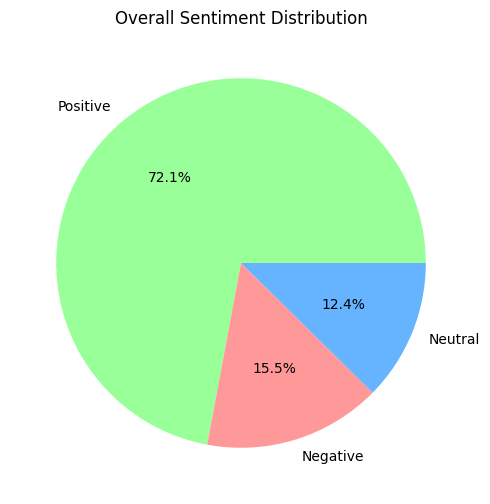

In [31]:
import matplotlib.pyplot as plt

sentiment_counts = absa_df['Sentiment'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#99ff99', '#ff9999', '#66b3ff'] )
plt.title("Overall Sentiment Distribution")
plt.show()

## Top 5 Positive and Negative Opinions

/tmp/ipython-input-32-2930138148.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=positive_opinions.values, y=positive_opinions.index, ax=axs[0], palette="Greens_d")
/tmp/ipython-input-32-2930138148.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=negative_opinions.values, y=negative_opinions.index, ax=axs[1], palette="Reds_d")


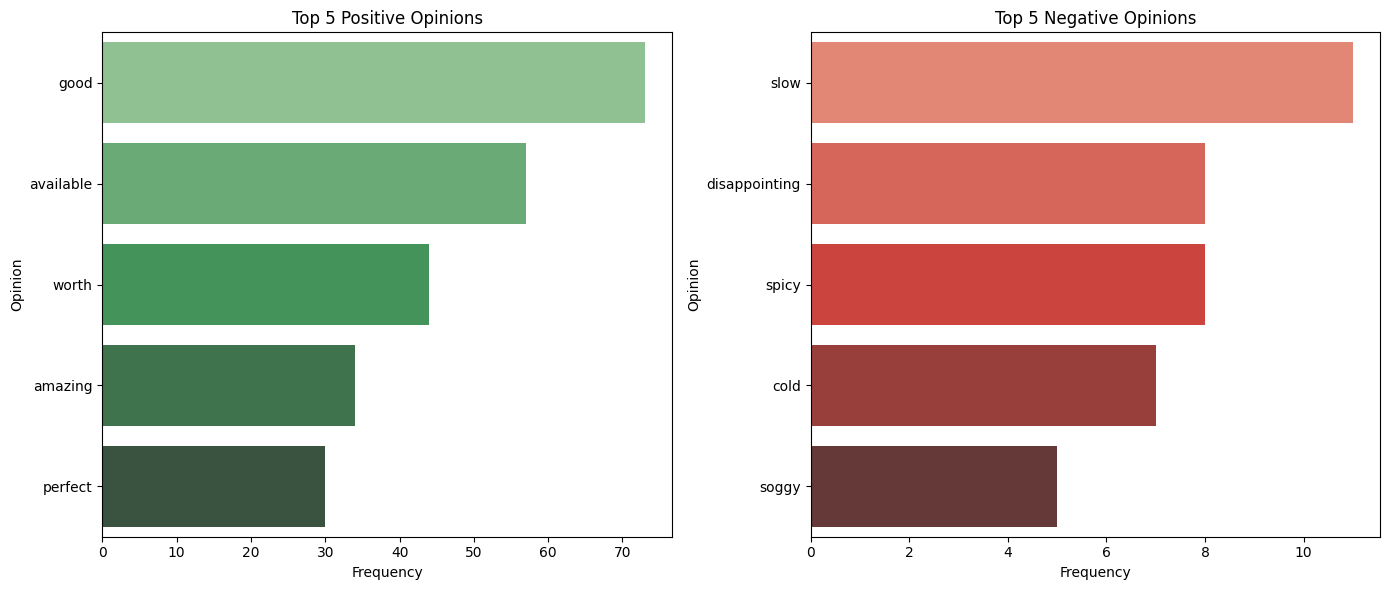

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count top positive and negative opinions
positive_opinions = absa_df[absa_df['Sentiment'] == "Positive"]['Opinion'].value_counts().nlargest(5)
negative_opinions = absa_df[absa_df['Sentiment'] == "Negative"]['Opinion'].value_counts().nlargest(5)

# Set up subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot positive opinions
sns.barplot(x=positive_opinions.values, y=positive_opinions.index, ax=axs[0], palette="Greens_d")
axs[0].set_title("Top 5 Positive Opinions")
axs[0].set_xlabel("Frequency")
axs[0].set_ylabel("Opinion")

# Plot negative opinions
sns.barplot(x=negative_opinions.values, y=negative_opinions.index, ax=axs[1], palette="Reds_d")
axs[1].set_title("Top 5 Negative Opinions")
axs[1].set_xlabel("Frequency")
axs[1].set_ylabel("Opinion")

plt.tight_layout()
plt.show()

## Aspect-wise Sentiment Distribution

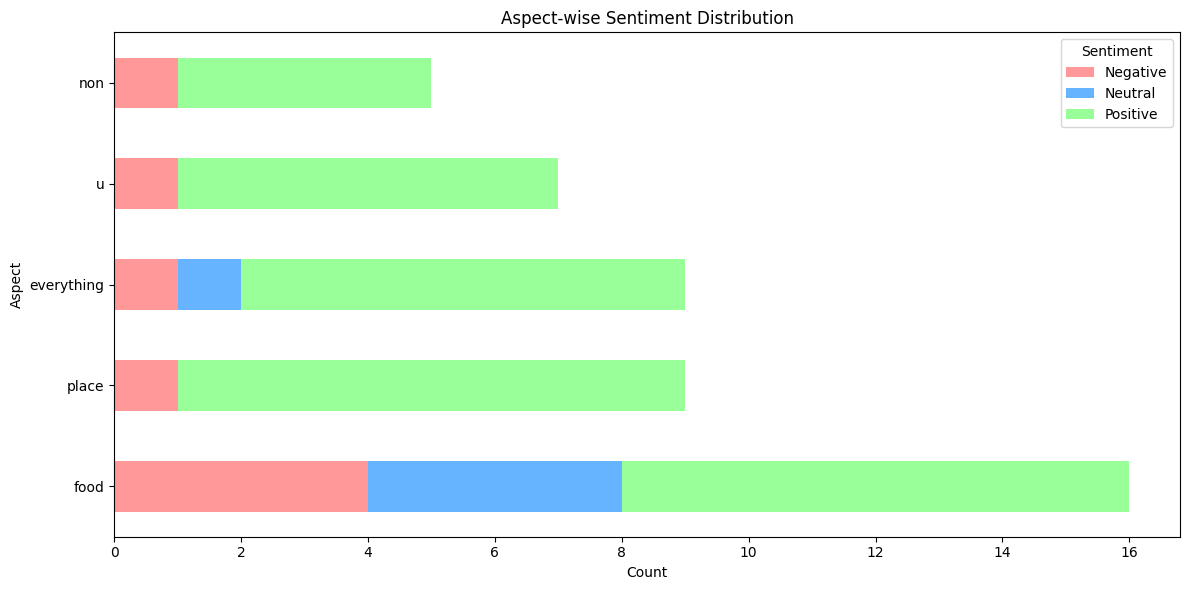

In [33]:
aspect_sentiment_counts = absa_df.groupby(['Aspect', 'Sentiment']).size().unstack().fillna(0)
aspect_sentiment_counts = aspect_sentiment_counts.sort_values(by='Positive', ascending=False)

# Define custom colors
custom_colors = {
    'Negative': '#ff9999',  # red
    'Neutral': '#66b3ff',   # blue
    'Positive': '#99ff99'   # green
}

# Ensure correct column order
aspect_sentiment_counts = aspect_sentiment_counts[['Negative', 'Neutral', 'Positive']]

# Plot as horizontal bar chart
aspect_sentiment_counts.head(5).plot(
    kind='barh',  # horizontal bar chart
    stacked=True,
    figsize=(12, 6),
    color=[custom_colors[col] for col in aspect_sentiment_counts.columns]
)

plt.title("Aspect-wise Sentiment Distribution")
plt.ylabel("Aspect")
plt.xlabel("Count")
plt.legend(title="Sentiment", loc='upper right')
plt.tight_layout()
plt.show()

## Opinion Trend Over Time (Monthly)

/tmp/ipython-input-34-2494219956.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = absa_df.resample('M')['Sentiment'].value_counts().unstack().fillna(0)


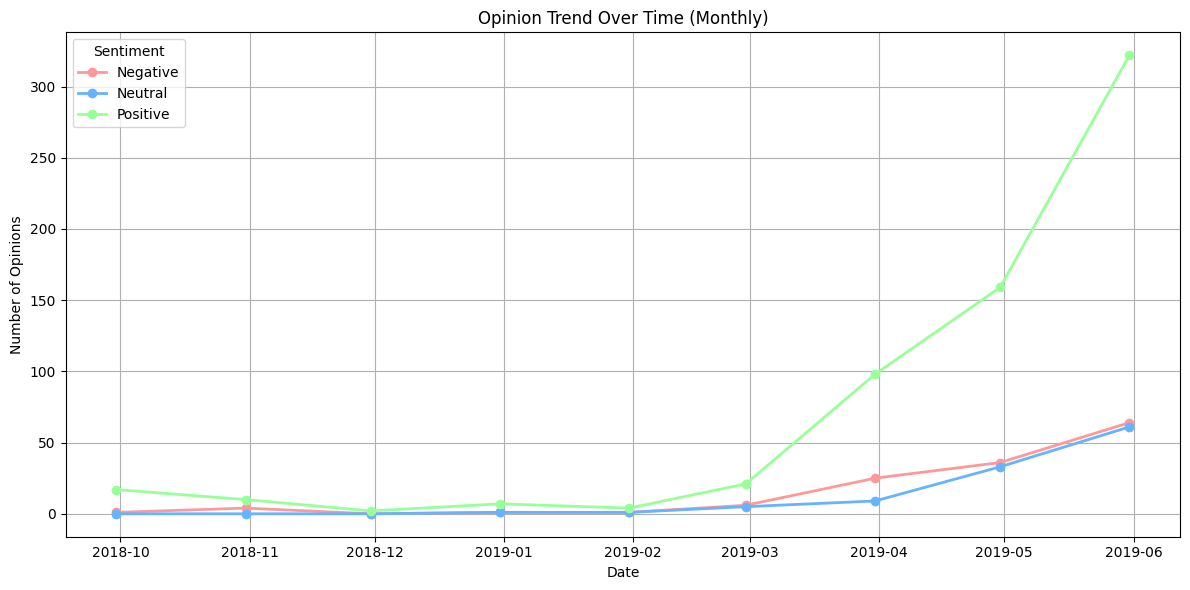

In [34]:
# Ensure 'Time' is datetime
data['Time'] = pd.to_datetime(data['Time'])

# Add to absa_df
absa_df['Timestamp'] = data['Time']

# Set datetime index
absa_df.set_index('Timestamp', inplace=True)

# Count opinions per month per sentiment
monthly_trend = absa_df.resample('M')['Sentiment'].value_counts().unstack().fillna(0)

# Define color map based on sentiment
custom_colors = {
    'Positive': '#99ff99',  # green
    'Negative': '#ff9999',  # red
    'Neutral': '#66b3ff'    # blue
}

# Plotting
plt.figure(figsize=(12, 6))

for sentiment in monthly_trend.columns:
    plt.plot(monthly_trend.index, monthly_trend[sentiment], marker='o', linewidth=2,
             label=sentiment, color=custom_colors.get(sentiment, 'gray'))  # default to gray if not found

plt.title("Opinion Trend Over Time (Monthly)")
plt.xlabel("Date")
plt.ylabel("Number of Opinions")
plt.legend(title="Sentiment")
plt.grid(True)
plt.tight_layout()
plt.show()


## Word Cloud

In [35]:
pip install wordcloud


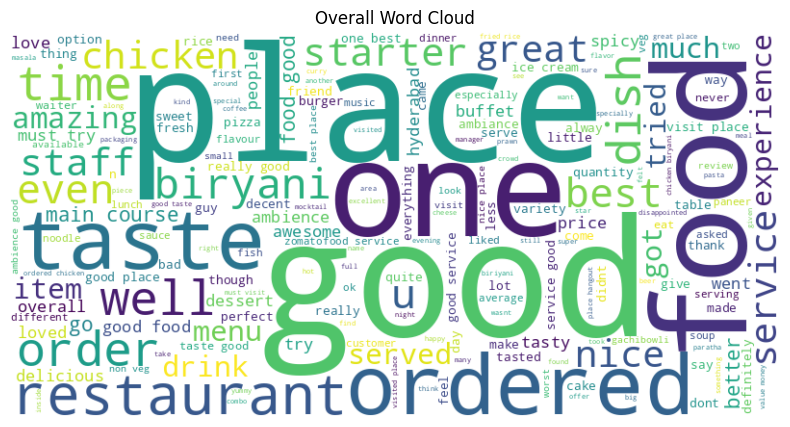

In [36]:
from wordcloud import WordCloud

# Join all cleaned reviews into a single string
text = ' '.join(data['Review'])

# Generate and display word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Overall Word Cloud')
plt.show()

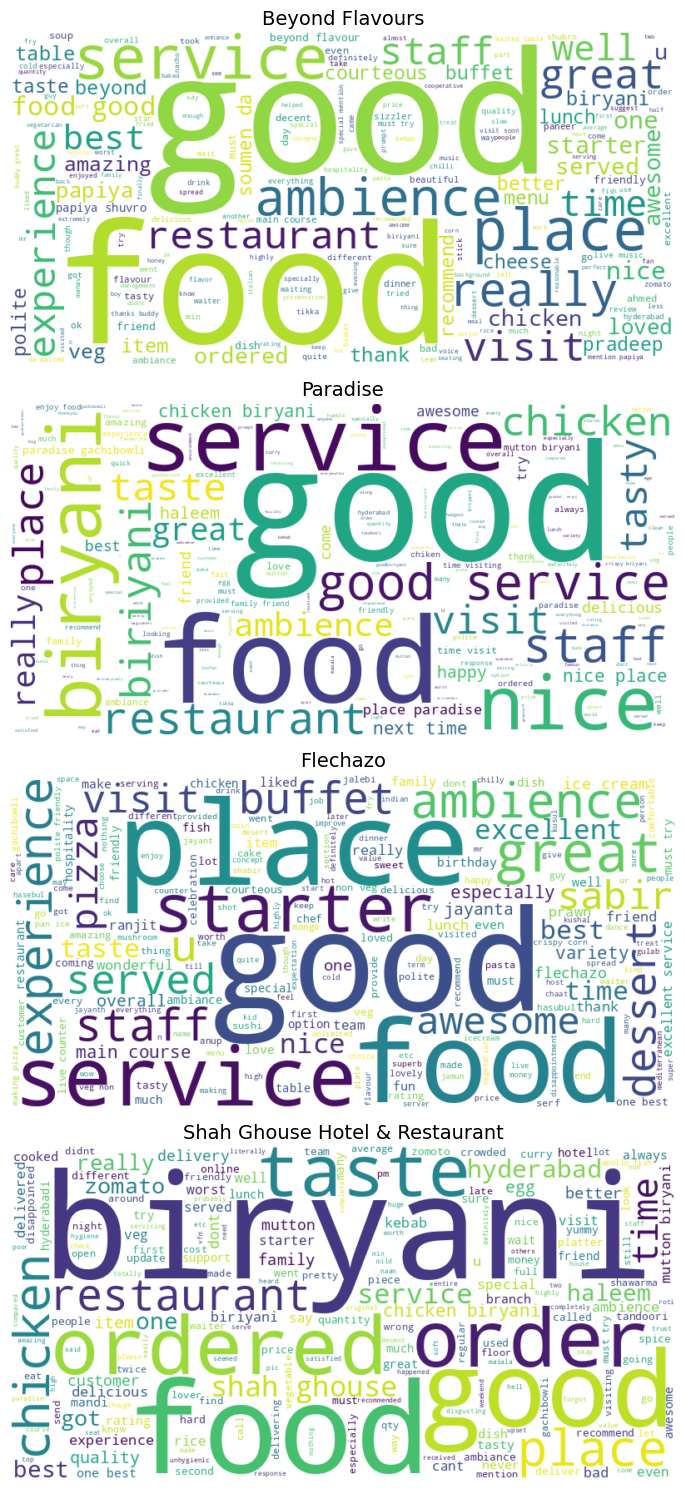

In [37]:
# Only show top 4 because there are too many restaurants

from wordcloud import WordCloud

# Get the first 4 unique restaurants
top_restaurants = data['Restaurant'].unique()[:4]

# Set up plot layout
plt.figure(figsize=(10, 15))

for i, restaurant in enumerate(top_restaurants):
    # Get all cleaned reviews for the restaurant
    reviews = data[data['Restaurant'] == restaurant]['Review']
    text = ' '.join(reviews)

    # Generate and plot word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.subplot(4, 1, i + 1)  # 4 rows, 1 column
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(restaurant, fontsize=14)

plt.tight_layout()
plt.show()

## Sentiment Distribution

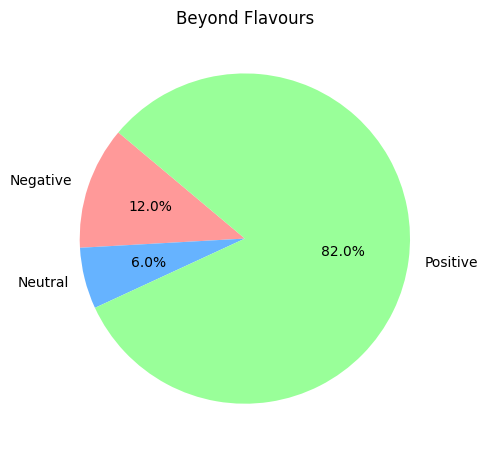

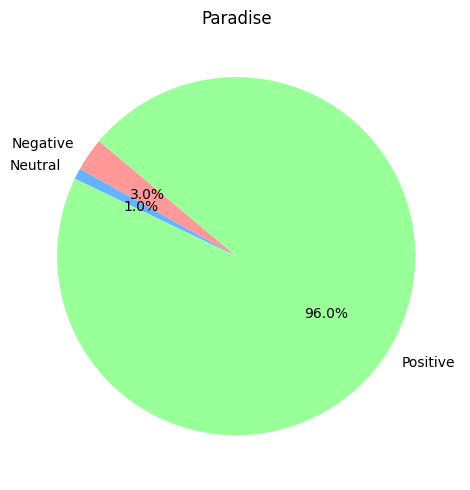

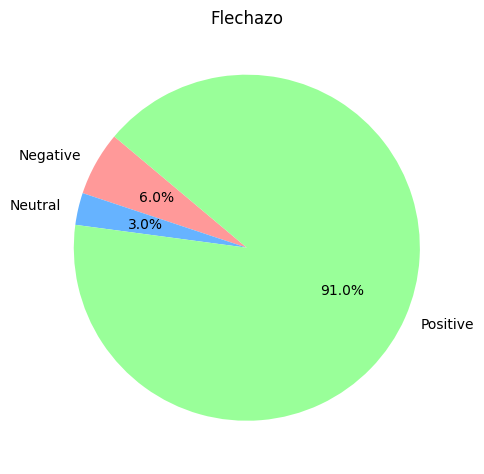

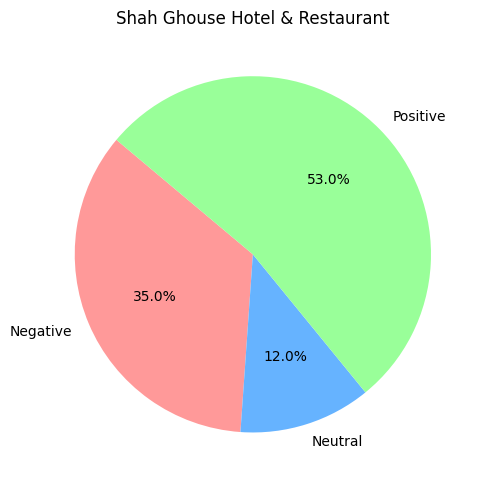

In [38]:
for restaurant in top_restaurants:
    rest_data = data[data['Restaurant'] == restaurant]
    sentiment_counts = rest_data['Sentiment'].value_counts().sort_index()
    labels = ['Negative', 'Neutral', 'Positive']
    colors = ['#ff9999', '#66b3ff', '#99ff99']

    plt.figure(figsize=(5, 5))
    plt.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
    plt.title(f'{restaurant}')
    plt.tight_layout()
    plt.show()

## Rating Distribution

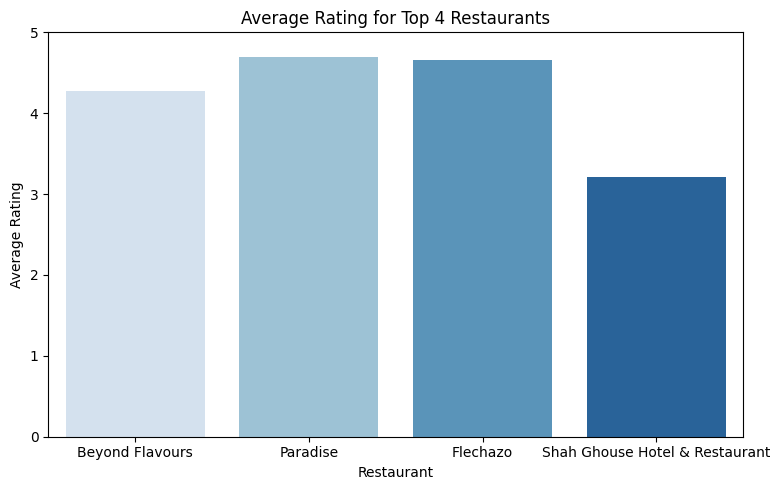

In [39]:
# Filter data
top_data = data[data['Restaurant'].isin(top_restaurants)].copy()

# Calculate average rating
avg_ratings = top_data.groupby('Restaurant')['Rating'].mean().reset_index()

# Force Restaurant column to follow dataset order
avg_ratings['Restaurant'] = pd.Categorical(avg_ratings['Restaurant'], categories=top_restaurants, ordered=True)

# Plot bar chart
plt.figure(figsize=(8,5))
sns.barplot(data=avg_ratings, x='Restaurant', y='Rating', hue='Restaurant', palette='Blues', legend=False)

plt.title('Average Rating for Top 4 Restaurants')
plt.ylabel('Average Rating')
plt.xlabel('Restaurant')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()


## VADER Compound Score Distribution

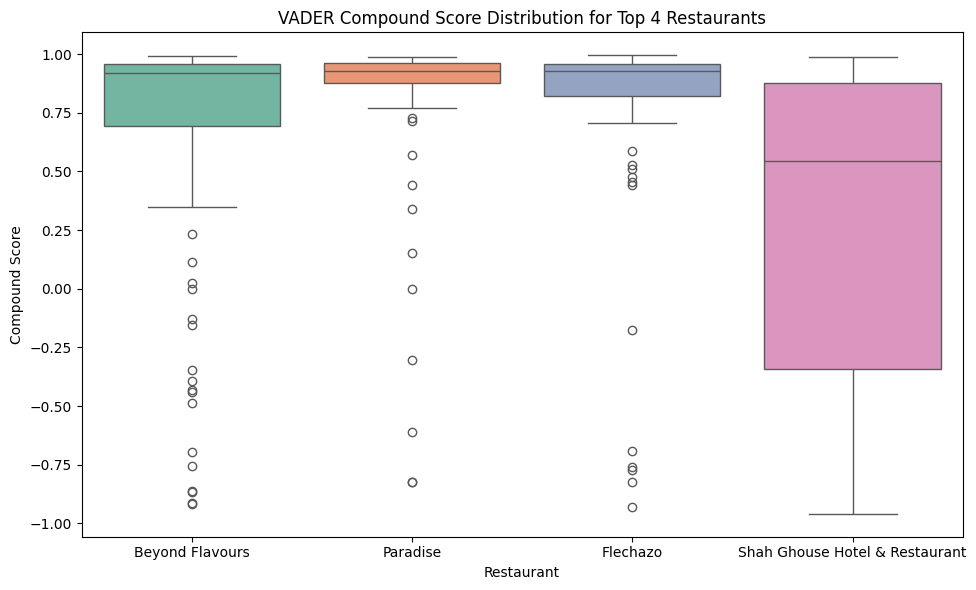

In [40]:
# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=top_data, x='Restaurant', y='VADER_Score', hue='Restaurant', palette='Set2', order=top_restaurants, legend=False)

plt.title('VADER Compound Score Distribution for Top 4 Restaurants')
plt.xlabel('Restaurant')
plt.ylabel('Compound Score')
plt.tight_layout()
plt.show()


## Data Augmentation for Sentiment 'Negative' and 'Nuetral'

In [41]:
data.head(10)

,Restaurant,Reviewer,Review,Rating,Time,VADER_Score,Sentiment
0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,2019-05-25 15:54:00,0.9664,2
1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,2019-05-25 14:20:00,0.9360,2
2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,2019-05-24 22:54:00,0.9186,2
3,Beyond Flavours,Swapnil Sarkar,soumen da arun great guy behavior sincerety go...,5.0,2019-05-24 22:11:00,0.8591,2
4,Beyond Flavours,Dileep,food goodwe ordered kodi drumstick basket mutt...,5.0,2019-05-24 21:37:00,0.9201,2
5,Beyond Flavours,Nagabhavani K,ambiance good service good food apradeecp subr...,5.0,2019-05-24 15:22:00,0.9565,2
6,Beyond Flavours,Jamuna Bhuwalka,nice place ambience different food ordered tas...,5.0,2019-05-24 01:02:00,0.7264,2
7,Beyond Flavours,Sandhya S,well reading many review finally visited place...,4.0,2019-05-23 15:01:00,0.2329,2
8,Beyond Flavours,Akash Thorat,excellent food specially like spicy food court...,5.0,2019-05-22 23:12:00,0.9638,2
9,Beyond Flavours,Smarak Patnaik,came birthday treat close friend perfect place...,5.0,2019-05-22 22:37:00,0.9831,2


In [42]:
data['Sentiment'].value_counts().sort_index()

,count
Sentiment,
0,2495
1,1192
2,6268


Here clearly show that there are imbalanced data between three for them

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# TF-IDF Vectorization (max 5000 features)
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data['Review'])  # Features
y = data['Sentiment']                    # Labels (0 = Negative, 1 = Neutral, 2 = Positive)

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42
)

# Check shapes
print("Train size:", X_train.shape)
print("Test size :", X_test.shape)

Train size: (7964, 5000)
Test size : (1991, 5000)


In [44]:
!pip install deep_translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.6 MB/s eta 0:00:00


In [45]:
from deep_translator import GoogleTranslator
import time

In [46]:
# Filter Neutral and Negative sentiment
neutral_data = data[data['Sentiment'] == 1]
negative_data = data[data['Sentiment'] == 0]

print(f"Original Neutral samples: {len(neutral_data)}")
print(f"Original Negative samples: {len(negative_data)}")

Original Neutral samples: 1192
Original Negative samples: 2495


In [47]:
# Back-translation function
def back_translate(text, src_lang="en", mid_lang="fr"):
    try:
        # Validate text length before sending to API
        if not isinstance(text, str) or len(text.strip()) == 0 or len(text) > 5000:
            raise ValueError("Invalid input length")

        french = GoogleTranslator(source=src_lang, target=mid_lang).translate(text)
        back_translated = GoogleTranslator(source=mid_lang, target=src_lang).translate(french)
        return back_translated
    except Exception as e:
        print("Translation error:", e)
        return text  # fallback

# Neutral reviews
augmented_neutral_reviews = []
for i, review in enumerate(neutral_data['Review'].head(3300)):
    try:
        new_review = back_translate(review)
        augmented_neutral_reviews.append(new_review)
    except:
        continue
    if i % 50 == 0:
        time.sleep(3)

neutral_augmented_df = pd.DataFrame({'Review': augmented_neutral_reviews, 'Sentiment': 1})

# Negative reviews
augmented_negative_reviews = []
for i, review in enumerate(negative_data['Review'].head(2000)):
    try:
        new_review = back_translate(review)
        augmented_negative_reviews.append(new_review)
    except:
        continue
    if i % 50 == 0:
        time.sleep(3)

negative_augmented_df = pd.DataFrame({'Review': augmented_negative_reviews, 'Sentiment': 0})

Translation error: Invalid input length
Translation error: None --> text must be a valid text with maximum 5000 character,otherwise it cannot be translated
Translation error: Invalid input length
Translation error: Invalid input length


In [48]:
# Combine original data with both augmented sets
augmented_data = pd.concat([neutral_augmented_df, negative_augmented_df], ignore_index=True)
data2 = pd.concat([data, augmented_data], ignore_index=True)

print("Sample augmented Neutral review:", neutral_augmented_df.iloc[0])
print("Sample augmented Negative review:", negative_augmented_df.iloc[0])
print("New dataset size after augmentation:", len(data2))

Sample augmented Neutral review: Review       Brief decent review of bad starter bread shaam...
Sentiment                                                    1
Name: 0, dtype: object
Sample augmented Negative review: Review       Corn cheese ball ordered manchow paneer shashl...
Sentiment                                                    0
Name: 0, dtype: object
New dataset size after augmentation: 13147


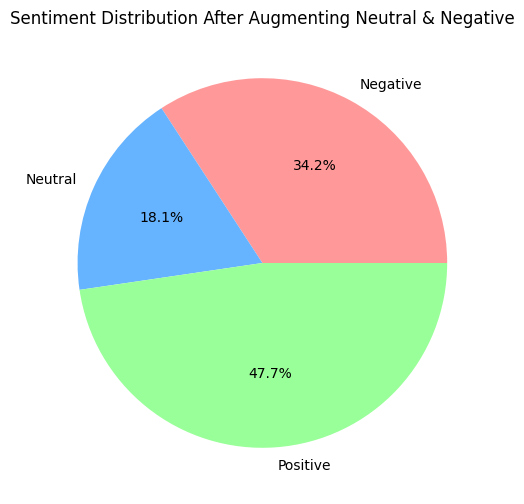

In [49]:
# Pie Chart of new distribution
import matplotlib.pyplot as plt

sentiment_counts_aug = data2['Sentiment'].value_counts().sort_index()
labels = ['Negative', 'Neutral', 'Positive']  # 0, 1, 2

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts_aug, labels=labels, autopct='%1.1f%%',
        colors=['#ff9999', '#66b3ff', '#99ff99'])
plt.title("Sentiment Distribution After Augmenting Neutral & Negative")
plt.show()

In [50]:
data2['Sentiment'].value_counts().sort_index()

,count
Sentiment,
0,4495
1,2384
2,6268


In [52]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [54]:
data2.to_csv("/content/drive/MyDrive/SMC2/Augmented_Sentiment_data.csv", index=False)

In [55]:
data2.to_csv("Augmented_Sentiment_data.csv", index=False)

## Modeling
### Machine Learning

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# TF-IDF Vectorization (on full augmented dataset)
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(data2['Review'])   # Use updated dataset
y = data2['Sentiment']                     # Labels from updated dataset

# Train/Test Split (stratified to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Check shapes
print("Train size:", X_train.shape)
print("Test size :", X_test.shape)

Train size: (10517, 5000)
Test size : (2630, 5000)


### Logistic Regression


Logistic Regression - Classification Result:


              precision    recall  f1-score   support

    Negative       0.80      0.86      0.83       899
     Neutral       0.67      0.42      0.51       477
    Positive       0.86      0.93      0.90      1254

    accuracy                           0.82      2630
   macro avg       0.78      0.74      0.75      2630
weighted avg       0.80      0.82      0.80      2630



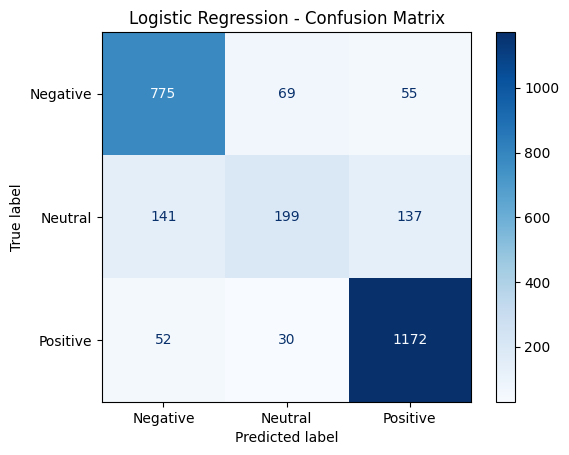

In [58]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluate
print("Logistic Regression - Classification Result:")
print("\n")
print(classification_report(y_test, y_pred_lr, target_names=["Negative", "Neutral", "Positive"]))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["Negative", "Neutral", "Positive"])
disp_lr.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

### Naive Baye

Naive Bayes - Classification Report:


              precision    recall  f1-score   support

    Negative       0.79      0.85      0.82       899
     Neutral       0.85      0.19      0.31       477
    Positive       0.78      0.97      0.87      1254

    accuracy                           0.79      2630
   macro avg       0.81      0.67      0.67      2630
weighted avg       0.80      0.79      0.75      2630



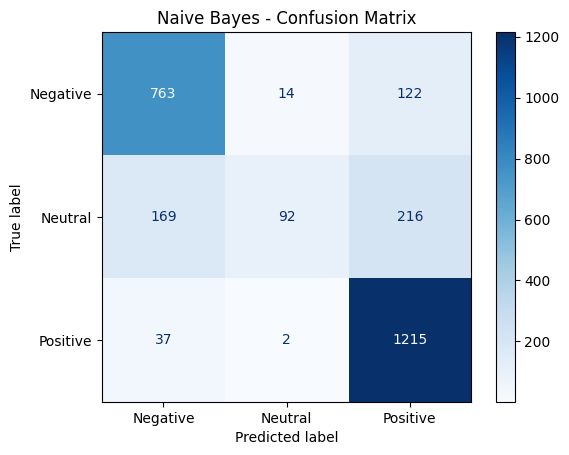

In [59]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes - Classification Report:")
print("\n")
print(classification_report(y_test, y_pred_nb, target_names=["Negative", "Neutral", "Positive"]))

cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=["Negative", "Neutral", "Positive"])
disp_nb.plot(cmap=plt.cm.Blues)
plt.title("Naive Bayes - Confusion Matrix")
plt.show()

### Support Vector Machine (SVM)

Linear SVC - Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.85      0.83       899
     Neutral       0.64      0.49      0.56       477
    Positive       0.86      0.92      0.89      1254

    accuracy                           0.82      2630
   macro avg       0.78      0.75      0.76      2630
weighted avg       0.81      0.82      0.81      2630



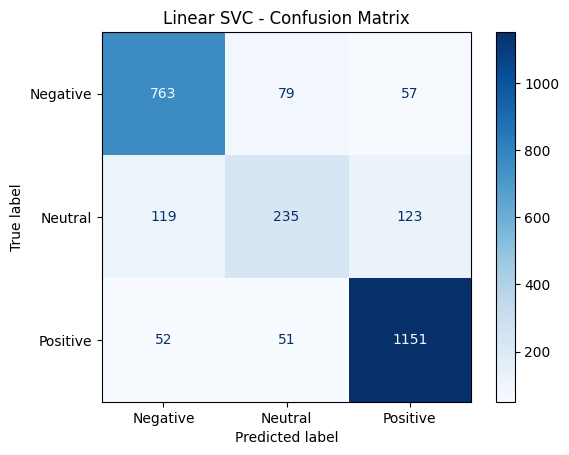

In [60]:
linear_svc_model = LinearSVC()
linear_svc_model.fit(X_train, y_train)
y_pred_linear_svc = linear_svc_model.predict(X_test)

print("Linear SVC - Classification Report:")
print(classification_report(y_test, y_pred_linear_svc, target_names=["Negative", "Neutral", "Positive"]))

cm_linear_svc = confusion_matrix(y_test, y_pred_linear_svc)
disp_linear_svc = ConfusionMatrixDisplay(confusion_matrix=cm_linear_svc, display_labels=["Negative", "Neutral", "Positive"])
disp_linear_svc.plot(cmap=plt.cm.Blues)
plt.title("Linear SVC - Confusion Matrix")
plt.show()

## K fold cross validation

In [61]:
from sklearn.model_selection import cross_val_score
import numpy as np

print("\nLogistic Regression - 5-Fold Cross-Validation:")
lr_model_cv = LogisticRegression(max_iter=2000)
lr_scores = cross_val_score(lr_model_cv, X, y, cv=5, scoring='f1_weighted')
print("F1-scores:", lr_scores)
print("Average F1-score:", np.mean(lr_scores))


Logistic Regression - 5-Fold Cross-Validation:
F1-scores: [0.75977811 0.7226689  0.7656695  0.82963295 0.8196195 ]
Average F1-score: 0.7794737902765172


In [62]:
print("\nNaive Bayes - 5-Fold Cross-Validation:")
nb_model_cv = MultinomialNB()
nb_scores = cross_val_score(nb_model_cv, X, y, cv=5, scoring='f1_weighted')
print("F1-scores:", nb_scores)
print("Average F1-score:", np.mean(nb_scores))



Naive Bayes - 5-Fold Cross-Validation:
F1-scores: [0.68216963 0.65072409 0.70798498 0.82168565 0.80324581]
Average F1-score: 0.7331620302655566


In [63]:
print("\nLinear SVC - 5-Fold Cross-Validation:")
svc_model_cv = LinearSVC(max_iter=2000)
svc_scores = cross_val_score(svc_model_cv, X, y, cv=5, scoring='f1_weighted')
print("F1-scores:", svc_scores)
print("Average F1-score:", np.mean(svc_scores))


Linear SVC - 5-Fold Cross-Validation:
F1-scores: [0.77220141 0.73929762 0.76027077 0.82822385 0.81037363]
Average F1-score: 0.7820734563281916


## Hyperparemeter Using Grid Search

Logistic Regression (Tuned) - Classification Report:
              precision    recall  f1-score   support

    Negative       0.82      0.84      0.83       899
     Neutral       0.63      0.49      0.55       477
    Positive       0.86      0.92      0.89      1254

    accuracy                           0.81      2630
   macro avg       0.77      0.75      0.76      2630
weighted avg       0.81      0.81      0.81      2630



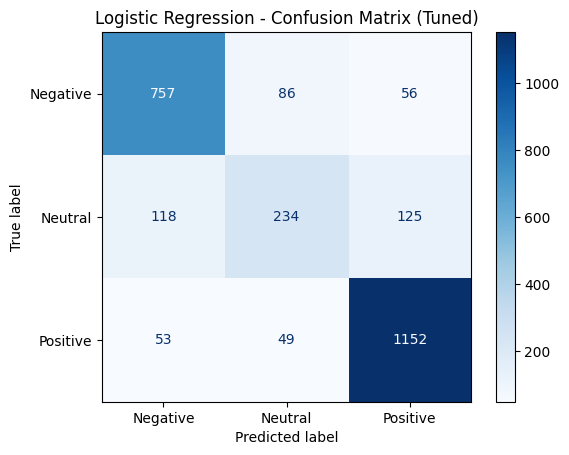

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define parameter grid (safe combinations)
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],  # 'l1' requires solver='liblinear' only
    'solver': ['lbfgs', 'liblinear']
}

# Initialize GridSearch
grid = GridSearchCV(
    LogisticRegression(max_iter=200),
    param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)
grid.fit(X_train, y_train)

# Best model & predictions
best_lr = grid.best_estimator_
y_pred_lr = best_lr.predict(X_test)

# Evaluation
print("Logistic Regression (Tuned) - Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=["Negative", "Neutral", "Positive"]))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=["Negative", "Neutral", "Positive"])
disp_lr.plot(cmap=plt.cm.Blues)
plt.title("Logistic Regression - Confusion Matrix (Tuned)")
plt.show()

# Best parameters
print("Best Hyperparameters:", grid.best_params_)

### Naive Baye

Best Naive Bayes - Classification Report (Tuned):


              precision    recall  f1-score   support

    Negative       0.81      0.84      0.83       899
     Neutral       0.77      0.38      0.50       477
    Positive       0.82      0.95      0.88      1254

    accuracy                           0.81      2630
   macro avg       0.80      0.72      0.74      2630
weighted avg       0.81      0.81      0.79      2630



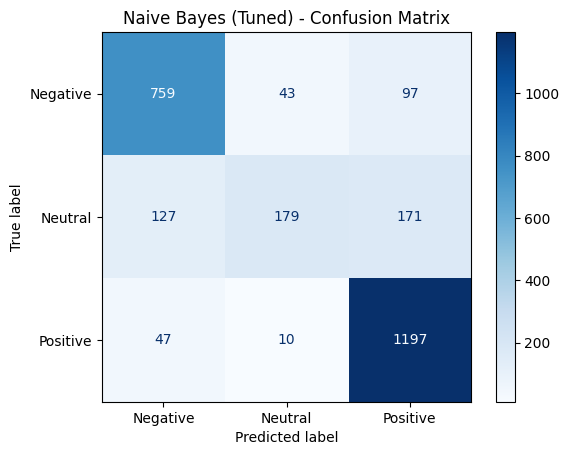

Best alpha: 0.1


In [65]:
nb = MultinomialNB()
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0]}

grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Use the best model to predict
best_nb_model = grid_search.best_estimator_
y_pred_best_nb = best_nb_model.predict(X_test)

print("Best Naive Bayes - Classification Report (Tuned):")
print("\n")
print(classification_report(y_test, y_pred_best_nb, target_names=["Negative", "Neutral", "Positive"]))

cm = confusion_matrix(y_test, y_pred_best_nb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Neutral", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Naive Bayes (Tuned) - Confusion Matrix")
plt.show()

print(f"Best alpha: {grid_search.best_params_['alpha']}")

### Support Vector Machine (SVM)

Linear SVC (Tuned) - Classification Report:
              precision    recall  f1-score   support

    Negative       0.83      0.82      0.83       899
     Neutral       0.60      0.58      0.59       477
    Positive       0.88      0.90      0.89      1254

    accuracy                           0.81      2630
   macro avg       0.77      0.77      0.77      2630
weighted avg       0.81      0.81      0.81      2630



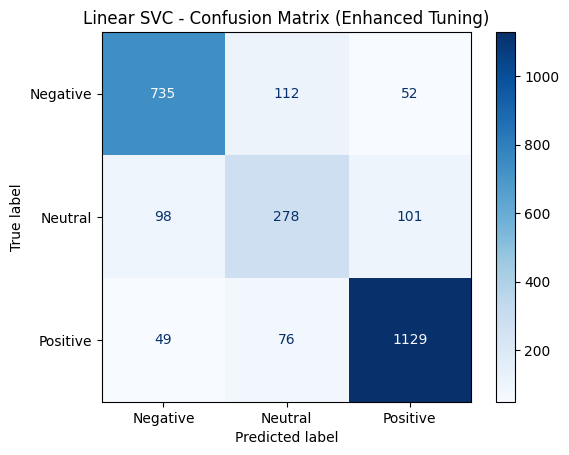

Best Linear SVC Hyperparameters: {'C': 1, 'class_weight': 'balanced', 'dual': False, 'max_iter': 1000}


In [66]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 3000, 5000],
    'class_weight': [None, 'balanced'],
    'dual': [False]
}

grid = GridSearchCV(
    LinearSVC(),
    param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

# Best model and predictions
best_linear_svc = grid.best_estimator_
y_pred_linear_svc = best_linear_svc.predict(X_test)

# Evaluation
print("Linear SVC (Tuned) - Classification Report:")
print(classification_report(y_test, y_pred_linear_svc, target_names=["Negative", "Neutral", "Positive"]))

# Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, y_pred_linear_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Neutral", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Linear SVC - Confusion Matrix (Enhanced Tuning)")
plt.show()

# Print best parameters
print("Best Linear SVC Hyperparameters:", grid.best_params_)

## Re-Apply K-Fold Cross-Validation Using Tuned Models

In [67]:
tuned_lr = LogisticRegression(C=10, penalty='l2', solver='liblinear', max_iter=1000)
lr_scores = cross_val_score(tuned_lr, X, y, cv=5, scoring='f1_macro')
print("Tuned Logistic Regression - F1-scores:", lr_scores)
print("Average F1-score:", lr_scores.mean())

Tuned Logistic Regression - F1-scores: [0.70652635 0.67812314 0.71512397 0.7906888  0.77698261]
Average F1-score: 0.7334889750451508


In [68]:
tuned_nb = MultinomialNB(alpha=0.1)
nb_scores = cross_val_score(tuned_nb, X, y, cv=5, scoring='f1_macro')
print("Tuned Naive Bayes - F1-scores:", nb_scores)
print("Average F1-score:", nb_scores.mean())

Tuned Naive Bayes - F1-scores: [0.63068118 0.60588974 0.67459012 0.79674067 0.78099968]
Average F1-score: 0.6977802769656927


In [69]:
tuned_svc = LinearSVC(C=1, class_weight='balanced', dual=False, max_iter=1000)
svc_scores = cross_val_score(tuned_svc, X, y, cv=5, scoring='f1_macro')
print("Tuned Linear SVC - F1-scores:", svc_scores)
print("Average F1-score:", svc_scores.mean())

Tuned Linear SVC - F1-scores: [0.7316791  0.69645077 0.72099092 0.77564149 0.76123954]
Average F1-score: 0.7372003634252894


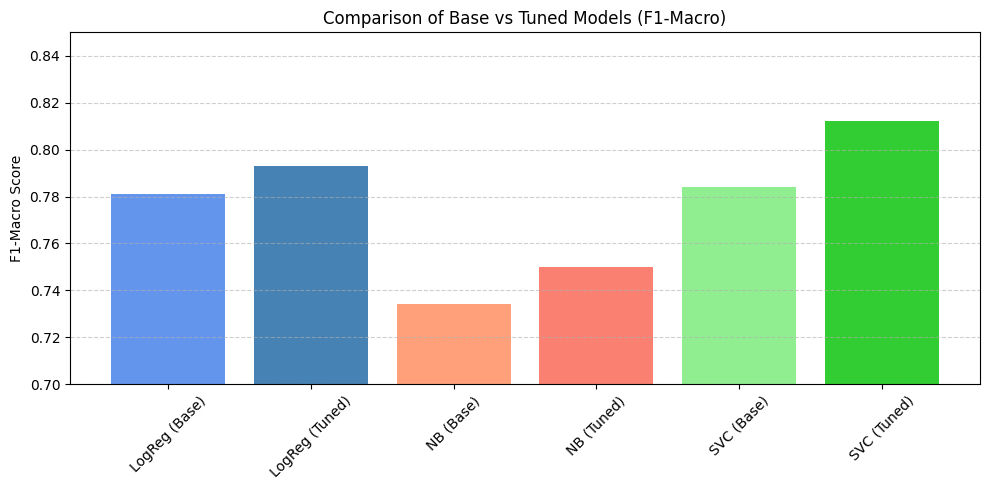

In [70]:
import matplotlib.pyplot as plt

# Replace these with your actual scores
f1_scores = {
    'LogReg (Base)': 0.781,
    'LogReg (Tuned)': 0.793,  # Example
    'NB (Base)': 0.734,
    'NB (Tuned)': 0.750,       # Example
    'SVC (Base)': 0.784,
    'SVC (Tuned)': 0.812       # Example
}

models = list(f1_scores.keys())
scores = list(f1_scores.values())

plt.figure(figsize=(10, 5))
plt.bar(models, scores, color=['#6495ED', '#4682B4', '#FFA07A', '#FA8072', '#90EE90', '#32CD32'])
plt.ylabel('F1-Macro Score')
plt.ylim(0.7, 0.85)
plt.title('Comparison of Base vs Tuned Models (F1-Macro)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()